In [21]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from __future__ import print_function
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from apiclient.http import MediaFileUpload

plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams['lines.linewidth'] = 3
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('font', size=22)
plt.rc('lin')


In [22]:
def generate_values(n, N, W):
    generated_signal = np.zeros(N)
    all_signals = np.zeros((n, N))
    start = time.time()
    for i in range(n):
        fi = 2*math.pi*random.random()
        A = 5 * random.random()
        w = W-i*W/(n)
        
        x = A * np.sin(np.arange(0, N, 1) * w + fi)
        all_signals[i] = x
        generated_signal += x
        
    lead_time = time.time() - start
    time_string = f"Execution time: {lead_time}"
    print(time_string)
#     write_file(time_string)
#     upload_to_drive("time.txt")
    return generated_signal, np.mean(all_signals, axis=0)

In [23]:
def draw(arr, x_label, y_label, title, legend, file_name=None):
    result, = plt.plot(range(len(arr)), arr, '-', label=legend)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    return result

In [24]:
def write_file(content, file_name="time.txt"):
    with open(file_name, "w") as f:
        f.write(content+"\n")

In [25]:
def upload_to_drive(file_name):
    SCOPES = ['https://www.googleapis.com/auth/drive']

    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('drive', 'v3', credentials=creds)
    file_metadata = {'name': file_name}
    media = MediaFileUpload(file_name)
    file = service.files().create(body=file_metadata,
                                    media_body=media,
                                    fields='id').execute()

In [26]:
def correlation_tau(arr, exp_val):
    arr = np.array(arr)
    Rxx = np.zeros(len(arr))
    for tau in range(len(arr)):
        Rxx[tau] = np.sum((arr[:len(arr) - tau] - exp_val) * (arr[tau: len(arr)] - exp_val)) / (len(arr) - 1)
    return Rxx

In [27]:
def correlation_tau_xy(arr1, arr2, exp_val1, exp_val2):
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    Rxy = np.zeros(len(arr1))
    for tau in range(len(arr1)):
        Rxy[tau] = np.sum((arr1[:len(arr1) - tau] - exp_val1) * (arr2[tau: len(arr2)] - exp_val2)) / (len(arr1) - 1)
    return Rxy

# Lab 1.1

Execution time: 0.00031256675720214844
Execution time: 0.00017642974853515625


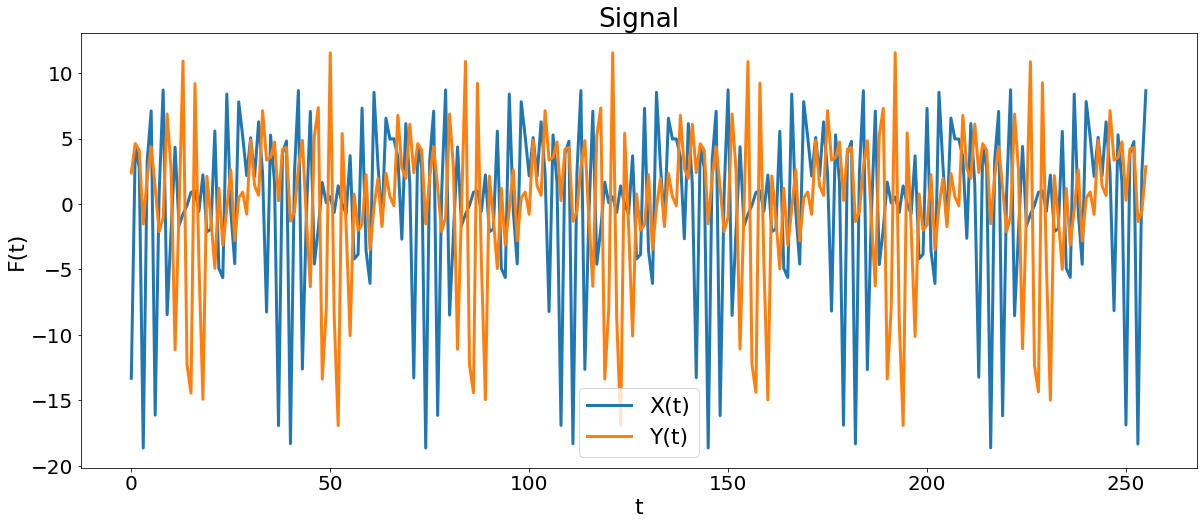

In [28]:
signal_1, _ = generate_values(10, 256, 900)
signal_2, _ = generate_values(10, 256, 900)
x_t = draw(signal_1, "t", "F(t)", "Signal", "X(t)")
y_t = draw(signal_2, "t", "F(t)", "Signal", "Y(t)")
plt.legend(handles=[x_t, y_t])
plt.show()

In [29]:
print(f"Expected value (1-st):  {np.mean(signal_1)}")
print(f"Variance (1-st):  {np.var(signal_1)}")
print(f"Expected value (2-nd):  {np.mean(signal_2)}")
print(f"Variance (2-nd):  {np.var(signal_2)}")

Expected value (1-st):  -0.06899671317998667
Variance (1-st):  42.432403645002175
Expected value (2-nd):  0.06062745703933797
Variance (2-nd):  33.56372145363238


# Lab 1.2


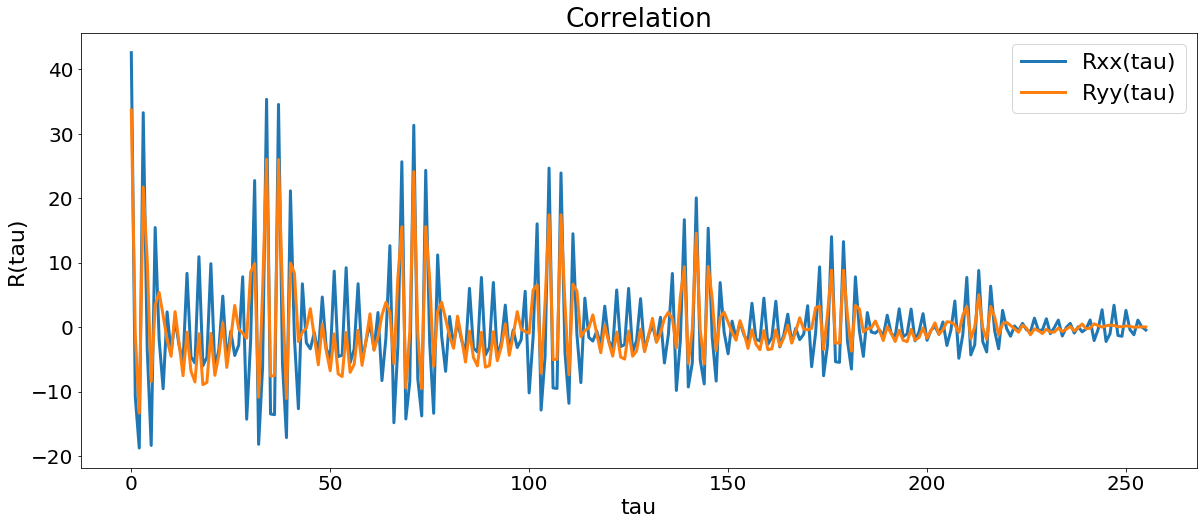

In [30]:
correlation_1 = correlation_tau(signal_1, np.mean(signal_1))
correlation_2 = correlation_tau(signal_2, np.mean(signal_2))
Rxx = draw(correlation_1, "tau", "R(tau)", "Correlation", "Rxx(tau)")
Ryy = draw(correlation_2, "tau", "R(tau)", "Correlation", "Ryy(tau)")
plt.legend(handles=[Rxx, Ryy])
plt.show()

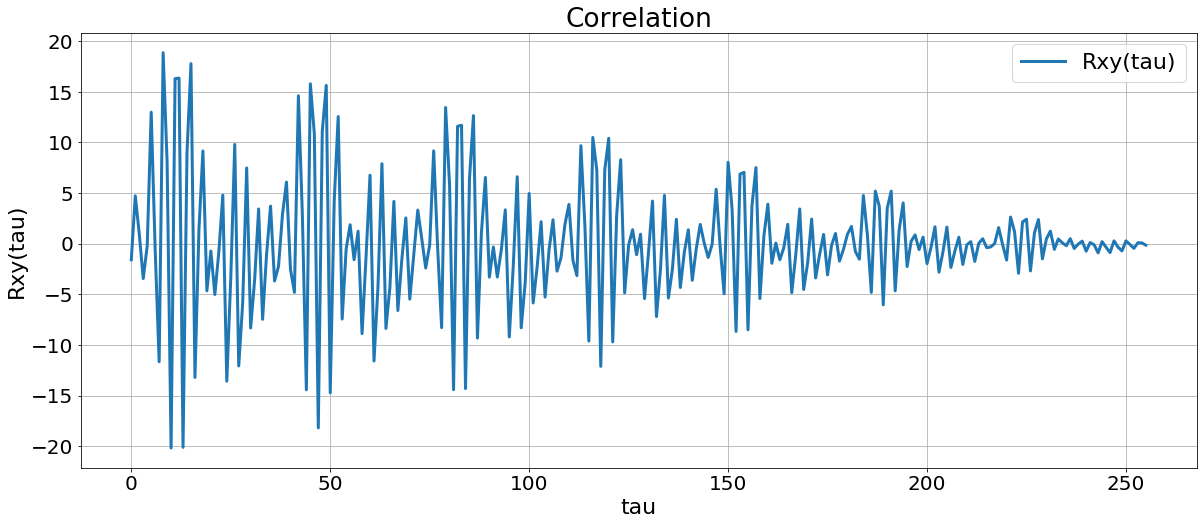

In [31]:
correlation_xy = correlation_tau_xy(signal_1, signal_2, np.mean(signal_1), np.mean(signal_2))
Rxy = draw(correlation_xy, "tau", "Rxy(tau)", "Correlation", "Rxy(tau)")
plt.legend(handles=[Rxy])
plt.show()

In [32]:
print(f"Correlation (Rxx(tau = 0)) (1-st): {correlation_1[0]}")
print(f"Correlation (Ryy(tau = 0)) (2-nd): {correlation_2[0]}")

Correlation (Rxx(tau = 0)) (1-st): 42.598805227923755
Correlation (Ryy(tau = 0)) (2-nd): 33.69534389070545
